In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Multilabel

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from multiclass_helper import draw_neural_net

In [9]:
def generate_dataset(N = 200):
    N = N//4
    v = 0.08 
    X1 = np.random.multivariate_normal([-0.5, 0.5], [[v, 0], [0, v]], size = N)
    X2 = np.random.multivariate_normal([0.5, -0.5], [[v, 0], [0, v]], size = N)
    X3 = np.random.multivariate_normal([0.5, 0.5], [[v, 0], [0, v]], size = N)
    X4 = np.random.multivariate_normal([-0.5, -0.5], [[v, 0], [0, v]], size = N)
    X = np.vstack([X1, X2, X3, X4])
    y = np.vstack([
        np.array(N*[[1, 0, 1, 0]]), 
        np.array(N*[[0, 1, 0, 1]]), 
        np.array(N*[[0, 1, 1, 0]]), 
        np.array(N*[[1, 0, 0, 1]])])
    return X, y

In [10]:
X, y = generate_dataset(N = 2000)

In [11]:
X.shape, y.shape

((2000, 2), (2000, 4))

In [12]:
print(X[:10])
print(y[:10])

[[-0.26731471  0.49527049]
 [-0.79897775  0.69136341]
 [-0.84342129 -0.01063163]
 [-0.5525145   0.21219532]
 [-0.17710916  0.76393854]
 [-0.76513871  0.37273049]
 [-0.49519277  0.41611843]
 [-0.11270277  1.02776437]
 [-0.3578499   0.31302654]
 [-0.1673817   0.153695  ]]
[[1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [1 0 1 0]]


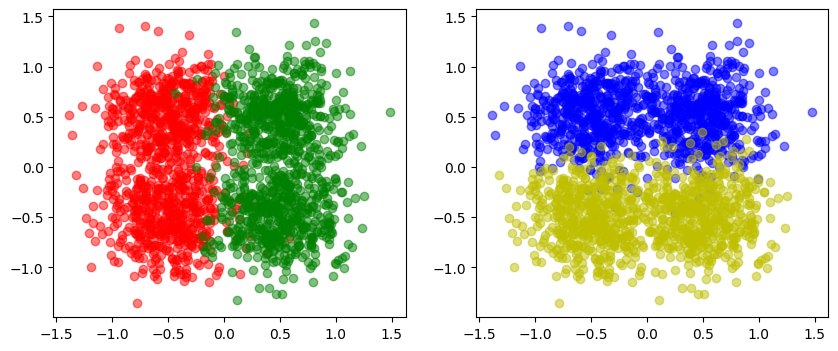

In [13]:
# [r, g, b, y]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4)) 
ax1.scatter(X[y[:,0]==1, 0], X[y[:,0]==1, 1], c='r', alpha=0.5)
ax1.scatter(X[y[:,1]==1, 0], X[y[:,1]==1, 1], c='g', alpha=0.5)
ax2.scatter(X[y[:,2]==1, 0], X[y[:,2]==1, 1], c='b', alpha=0.5)
ax2.scatter(X[y[:,3]==1, 0], X[y[:,3]==1, 1], c='y', alpha=0.5)
plt.show()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

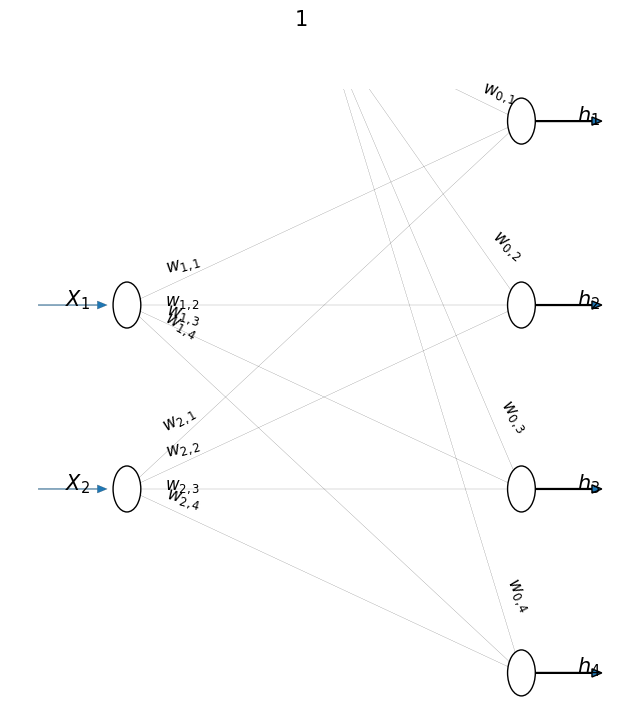

In [20]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
biases = [[ '$w_{0,1}$', '$w_{0,2}$', '$w_{0,3}$', '$w_{0,4}$']]
capa_1 = [['$w_{1,1}$', '$w_{1,2}$', '$w_{1,3}$', '$w_{1,4}$'],
          ['$w_{2,1}$', '$w_{2,2}$', '$w_{2,3}$', '$w_{2,4}$'], 
          ['$w_{3,1}$', '$w_{3,2}$', '$w_{3,3}$', '$w_{3,4}$']]
weights = [np.array(capa_1)]
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, [2,4], weights, biases)
plt.show()

In [29]:
hidden_units = 20
input_features=2
output_size = y.shape[1]
model = Sequential()
model.add(Dense(output_size, name="Salida", activation='sigmoid', input_shape=(2, )))
model.summary()


lr = 0.001
# Lo compilo, notar que en vez de binary_crossentropy va categorical_crossentropy
model.compile(loss = 'binary_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Salida (Dense)               (None, 4)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


/Users/julian/opt/anaconda3/envs/RL/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [30]:
batch_size = 20
epochs = 100

model.fit(X, y, epochs=epochs)

Epoch 1/100
63/63 [==============================] - 0s 575us/step - loss: 0.6528 - accuracy: 0.4390
Epoch 2/100
63/63 [==============================] - 0s 592us/step - loss: 0.6365 - accuracy: 0.4755
Epoch 3/100
63/63 [==============================] - 0s 581us/step - loss: 0.6209 - accuracy: 0.5070
Epoch 4/100
63/63 [==============================] - 0s 600us/step - loss: 0.6059 - accuracy: 0.5440
Epoch 5/100
63/63 [==============================] - 0s 631us/step - loss: 0.5915 - accuracy: 0.5780
Epoch 6/100
63/63 [==============================] - 0s 642us/step - loss: 0.5778 - accuracy: 0.6195
Epoch 7/100
63/63 [==============================] - 0s 798us/step - loss: 0.5645 - accuracy: 0.6455
Epoch 8/100
63/63 [==============================] - 0s 881us/step - loss: 0.5519 - accuracy: 0.6535
Epoch 9/100
63/63 [==============================] - 0s 947us/step - loss: 0.5398 - accuracy: 0.6560
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy

In [23]:
# [r, g, b, y]
model.predict(np.array([[0.5, 0.5]]))

array([[8.7797642e-04, 9.9912220e-01, 9.9742985e-01, 2.5688708e-03]],
      dtype=float32)

In [24]:
model.evaluate(np.array([[0.5, 0.5]]), np.array([[0, 1, 1, 0]]))

1/1 [==============================] - 0s 740us/step - loss: 0.0023 - accuracy: 1.0000


[0.0023358440957963467, 1.0]

In [25]:
model.predict_proba(np.array([[0.5, 0.5]]))

array([[0.00179479, 0.99820536, 0.99712884, 0.00287136]], dtype=float32)

In [26]:
coefs_, intercept_ = model.get_weights()

In [27]:
coefs_

array([[-12.318755  ,  12.318894  ,  -0.05021025,   0.05021169],
       [  0.11165709,  -0.11165001,  12.186125  , -12.185939  ]],
      dtype=float32)

In [28]:
intercept_

array([-0.21753998,  0.21750538, -0.21777019,  0.2177669 ], dtype=float32)

In [29]:
(-np.log(1-0.00860339) - np.log(0.99038637) - np.log(0.982608) - np.log(1-0.01459989))/4

0.012638321732369315